<a href="https://colab.research.google.com/github/saiprashanthig/Math_Techniques_in_Data_Science/blob/Homework/702687444_Sai_Prashanthi_HW3_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Student name: **[Sai Prashanthi G]**
*   Student ID: **[702687444]**
*   Collaborator(s): **[None]**

# MATH637-011 Homework 3 (10% total grade)

## **Deadline: 10/27/2023 11:59 PM**

In this homework, we will train and test a simple convolutional neural network on the [Fashion MNIST dataset](https://www.tensorflow.org/tutorials/keras/classification) using Keras. This dataset contains grayscale images of 10 different fashion categories.


## 1. Download and load dataset (1% total grade)

Read [this API](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) and use the function `fashion_mnist.load_data()` to download and load the data into the variables: `X_train, Y_train, X_test, Y_test`.

You should make sure that the shapes of `X_train, Y_train, X_test, Y_test` are `(60000, 28, 28) (60000,), (10000, 28, 28), (10000,)` respectively.

In [ ]:
from keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## 2. Convert pixel values to range [0, 1] (1% total grade)

The pixel values of your loaded images are integers in `[0, 255]`, while classifiers usually require real-valued pixels in `[0, 1]` to work well.

Write code to convert the train and test images' pixels in `X_train` and `X_test` to range `[0, 1]` by dividing all pixels by `255.0`.

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

## 3. Inspect some train images and labels (1% total grade)

Given a variable `img_id`, write code to:
*   Plot the input image at index `img_id` in the training set.
*   And print out the label string of this image.

You can vary `img_id` to see different input images and the corresponding labels. (Choose a value for `img_id` to run the code; you don't have to write a function).

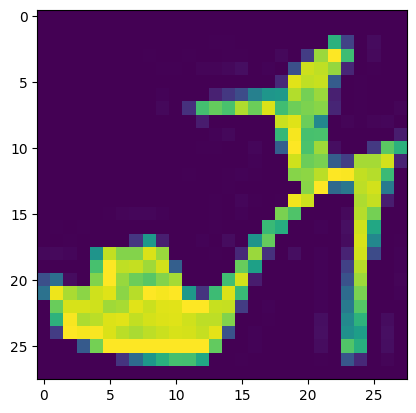

Sandal


In [ ]:
import matplotlib.pyplot as plt

img_id = 9
image = X_train[img_id]
label = Y_train[img_id]

label_str=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.imshow(image)
plt.show()
print(label_str[label])

## 4. Reshape input images (1% total grade)

To train and test a CNN model,
each input image must have 3 dimensions (height, width, channel). However, the images in `X_train` and `X_test` only have 2 dimensions currently (height, width). Write code to reshape `X_train` and `X_test` to include one additional dimension for the channel.

The new shapes for `X_train` and `X_test` should be `(60000, 28, 28, 1)` and `(10000, 28, 28, 1)`.

In [ ]:
import numpy as np
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


## 5. Convert label vectors into one-hot encodings (1% total grade)

To train/test a model with Keras, the labels have to be in one-hot encoding format. Write code to convert the train and test label vectors into one-hot encodings.

In [ ]:
from tensorflow import keras
from keras import layers

In [ ]:
num_classes = 10
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

## 6. Define the CNN model (2% total grade)

Write code to define a CNN model with:
*   1 convolutional layer with 16 3x3 filters, `relu` activation, and `same` padding. Be sure to set the correct `input_shape` for this dataset.
*   1 max pooling layer with a 2x2 filter.
*   Then the resulting tensor is flattened into a vector.
*   The flattened vector is put through a Dense layer with 50 hidden nodes and `relu` activation.
*   Finally, a Dense output layer with 10 output labels and `softmax` activation.

In [ ]:
from tensorflow import keras
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(16,activation='relu', padding="same",kernel_size =(3, 3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
#To add an output layer for classification with 10 classes and softmax activation:
num_classes = 10
model.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 50)                156850    
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 157520 (615.31 KB)
Trainable params: 157520 (615.31 KB)
Non-trainable params: 0 (0.00 Byte)
______________

## 7. Compile the model (1% total grade)

Write code to compile the model with `loss='categorical_crossentropy'`, `optimizer='sgd'`, and `metrics=['accuracy']`.

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## 8. Train the model (1% total grade)

Write code to train the model for 10 epochs and with batch_size=128.

In [ ]:
batch_size = 128
epochs = 10
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 1.1706 - accuracy: 0.6103 - val_loss: 0.6757 - val_accuracy: 0.7610
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.6240 - accuracy: 0.7800 - val_loss: 0.5846 - val_accuracy: 0.7837
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.5492 - accuracy: 0.8046 - val_loss: 0.5155 - val_accuracy: 0.8103
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.5155 - accuracy: 0.8162 - val_loss: 0.4964 - val_accuracy: 0.8195
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.4890 - accuracy: 0.8261 - val_loss: 0.5029 - val_accuracy: 0.8152
Epoch 6/10
422/422 [==============================] - 2s 6ms/step - loss: 0.4723 - accuracy: 0.8342 - val_loss: 0.4615 - val_accuracy: 0.8372
Epoch 7/10
422/422 [==============================] - 3s 7ms/step - loss: 0.4556 - accuracy: 0.8403 - val_loss: 0.4457 - val_accuracy: 0.8408
Epoch 

## 9. Evaluate the trained model on test set (1% total grade)

Write code to compute and print out the accuracy of the model on test set.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test accuracy is :" , test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.4397 - accuracy: 0.8428
Test accuracy is : 0.8428000211715698


## 10. Bonus: Plot some test images and compare true labels with predicted labels

(This is just for fun though. If you make a mistake somewhere then I can consider this for more credits).

Given the `img_id` variable:
*   Plot the image with index `img_id` in your **test set**.
*   Print out the true label string of the image.
*   Print out the predicted label string of the image (computed from your trained model above).

See below for a sample output.

313/313 [==============================] - 1s 2ms/step


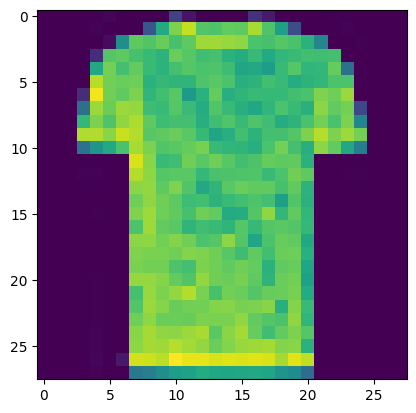

True label is  T-shirt/top
Predicted label is  T-shirt/top


In [ ]:
Y_predict_test= model.predict(X_test)
Y_predict_test_final=np.argmax(Y_predict_test, axis=1)
Y_test=np.argmax(Y_test, axis=1)

img_id = 125
image = X_test[img_id]
plt.imshow(image)
plt.show()

print("True label is ", label_str[Y_predict_test_final[img_id]])
print("Predicted label is ", label_str[Y_test[img_id]])
